In [1]:
# 富士山下山問題

# 今回の課題：富士山の標高データを **最小化したい目的関数** に見立てて、富士山からの下山プログラムを作成すること

In [2]:
# 必要なライブラリのインポート
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import timeit

In [3]:
# csv_pathを富士山のデータのファイル名とする。
csv_path = "mtfuji_data.csv" 

np.set_printoptions(suppress=True) 

# fujiを富士山のデータとする。
fuji = np.loadtxt(csv_path , delimiter="," , skiprows=1)

In [4]:
print("標高データセットの一部を表示\n{}".format(fuji[130:140]))

標高データセットの一部を表示
[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


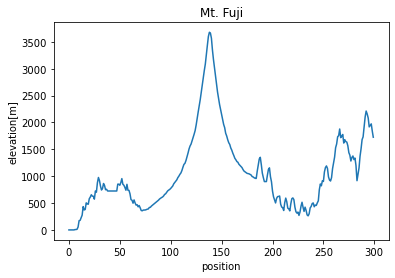

In [6]:
# 問題1:データの可視化

plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:, 0], fuji[:, 3]) # その地点の番号は0からの連番なので省略も可能（しかし、番号が異なる場合もありえるので解答例としては明示）
plt.show()

In [12]:
# 問題2:ある地点の勾配を計算する関数を作成

# compute_gradientを今いる地点の勾配を計算する関数とする。
def compute_gradient(position, elevations):
    return elevations[position] - elevations[position-1]

position = 130
fuji_elevations = fuji[:, 3]
print("{}番地点の勾配：{}".format(position, compute_gradient(position, fuji_elevations)))

130番地点の勾配：137.30000000000018


In [16]:
# 問題3:移動先の地点を計算する関数を作成

# compute_next_positionを移動先の地点を計算する関数として定義
def compute_next_position(position, elevations, alpha=0.1):
    next_position = position - alpha*compute_gradient(position, elevations)
    next_position = np.maximum(1, next_position) # 範囲より小さい値を範囲内に収める（1未満を1にする）
    next_position = np.minimum(len(elevations)-1, next_position) # 範囲より大きい値を範囲内に収める
    next_position_int = np.round(next_position).astype(np.int)
    return next_position_int

position = 136
fuji_elevations = fuji[:, 3]
next_position = compute_next_position(position , fuji_elevations, alpha=0.1)

print("{}番地点の次に移動する地点：{}".format(position, next_position))

136番地点の次に移動する地点：119


C:\Users\tixt1\AppData\Local\Temp\ipykernel_28576\657371586.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  next_position_int = np.round(next_position).astype(np.int)


In [18]:
# 問題4:山を下る関数を作成

# descend_mountainを山を下る過程を計算する関数として定義
def descend_mountain(start_position, elevations, alpha=0.1):
    positions = [start_position]
    while positions[-1] not in positions[:-1]:
        positions.append(compute_next_position(positions[-1], elevations, alpha=alpha))
    return positions[:-1]

start_position = 136
fuji_elevations = fuji[:, 3]
descended_list = descend_mountain(start_position, fuji_elevations, alpha=0.1)
print("山を下る過程で通る地点番号の一覧：{}".format(descended_list))

山を下る過程で通る地点番号の一覧：[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]


C:\Users\tixt1\AppData\Local\Temp\ipykernel_28576\657371586.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  next_position_int = np.round(next_position).astype(np.int)


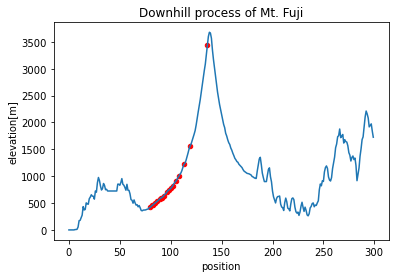

In [19]:
# 問題5:富士山の下山過程の可視化の問題

fuji_elevations = fuji[:, 3]
descended_elevations = fuji_elevations[descended_list]

# 断面図の中に移動した地点を点で表示する
plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('position')
plt.plot(fuji_elevations)
plt.scatter(descended_list, descended_elevations, 20, color='red')
plt.show()

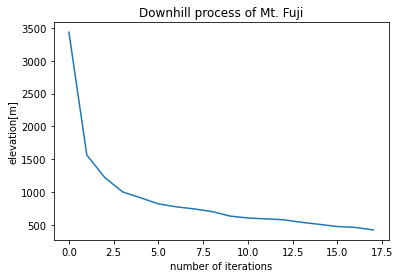

In [20]:
fuji_elevations = fuji[:, 3]
descended_elevations = fuji_elevations[descended_list]

# 繰り返し毎の標高を折れ線グラフにする
plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('number of iterations')
plt.plot(descended_elevations)
plt.show()

作成したリストの種類：299


C:\Users\tixt1\AppData\Local\Temp\ipykernel_28576\657371586.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  next_position_int = np.round(next_position).astype(np.int)


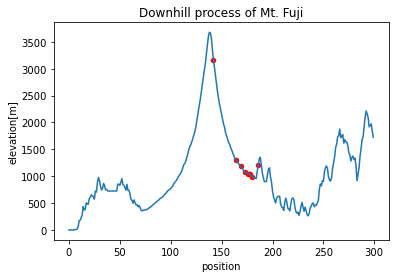

In [22]:
# 問題6:初期値の変更

descended_lists = []
for i, start_position in enumerate(range(1, 300)):
    descended_lists.append(descend_mountain(start_position, fuji[:, 3], alpha=0.2))
print("作成したリストの種類：{}".format(len(descended_lists))) #299通り計算できたことを確認

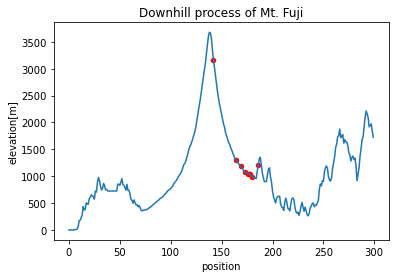

In [28]:
# 逆側を降りる様子を可視化してみる
plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('position')
plt.plot(fuji[:, 3])
plt.scatter(descended_lists[141], fuji[:, 3][descended_lists[141]], 20, color='red')
plt.show()

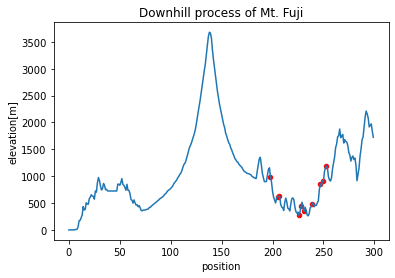

In [24]:
# さらに異なる位置を可視化してみる
plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('position')
plt.plot(fuji[:, 3])
plt.scatter(descended_lists[249], fuji[:, 3][descended_lists[249]], 20, color='red')
plt.show()

In [25]:
# 問題7:ハイパーパラメータの変更

start_position = 136
alphas = np.array([0.005, 0.01, 0.05, 0.1, 0.5, 1])

descended_lists_alphas = []
for i, alpha in enumerate(alphas):
    descended_lists_alphas.append(descend_mountain(start_position, fuji[:, 3], alpha=alpha))
print("作成したリストの種類：{}".format(len(descended_lists_alphas)))

作成したリストの種類：6


C:\Users\tixt1\AppData\Local\Temp\ipykernel_28576\657371586.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  next_position_int = np.round(next_position).astype(np.int)


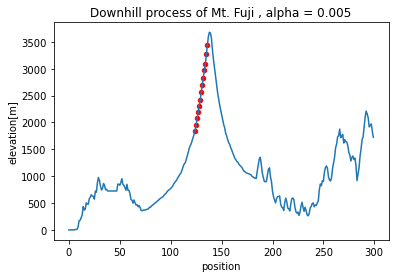

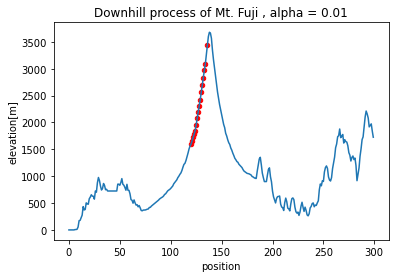

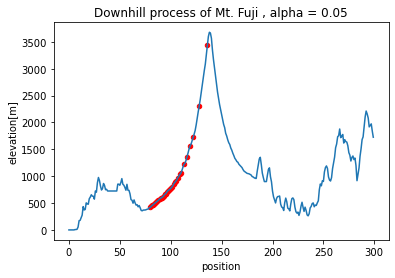

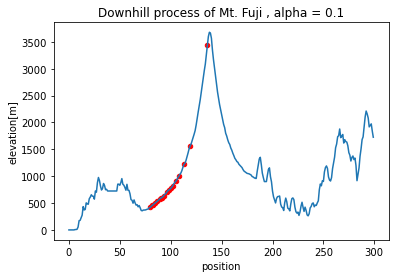

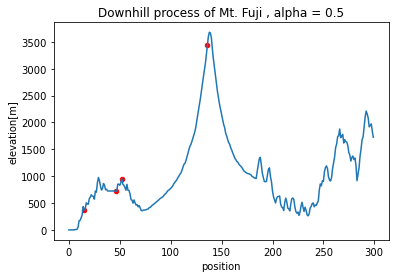

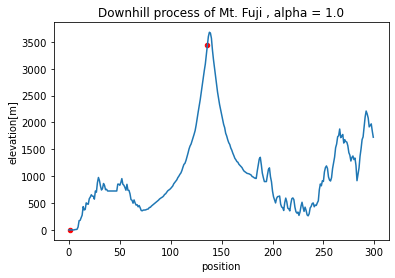

In [26]:
for i, alpha in enumerate(alphas):
    plt.title('Downhill process of Mt. Fuji , alpha = {}'.format(alpha))
    plt.ylabel('elevation[m]')
    plt.xlabel('position')
    plt.plot(fuji[:, 3])
    plt.scatter(descended_lists_alphas[i], fuji[:, 3][descended_lists_alphas[i]], 20, color='red')
    plt.show()